## Principle Component Analysis (PCA)
* Goal of PCA is to reduce the dimensionality of multidimensional data. 
* Uses linear algebra:
> * method of finding the axis with the largest distribution of variance, and finding and projecting the second axis that is orthogonal to this axis and has the largest variance
* To preserve the variance of the raw data, find eigenvalues and eigenvectors of the covariance matrix
* Difficult to intuitively interpret the generated two axes
* Disadvantages in that the clustered data is crushed as the dimension is reduced due to orthographic projection in a linear way.

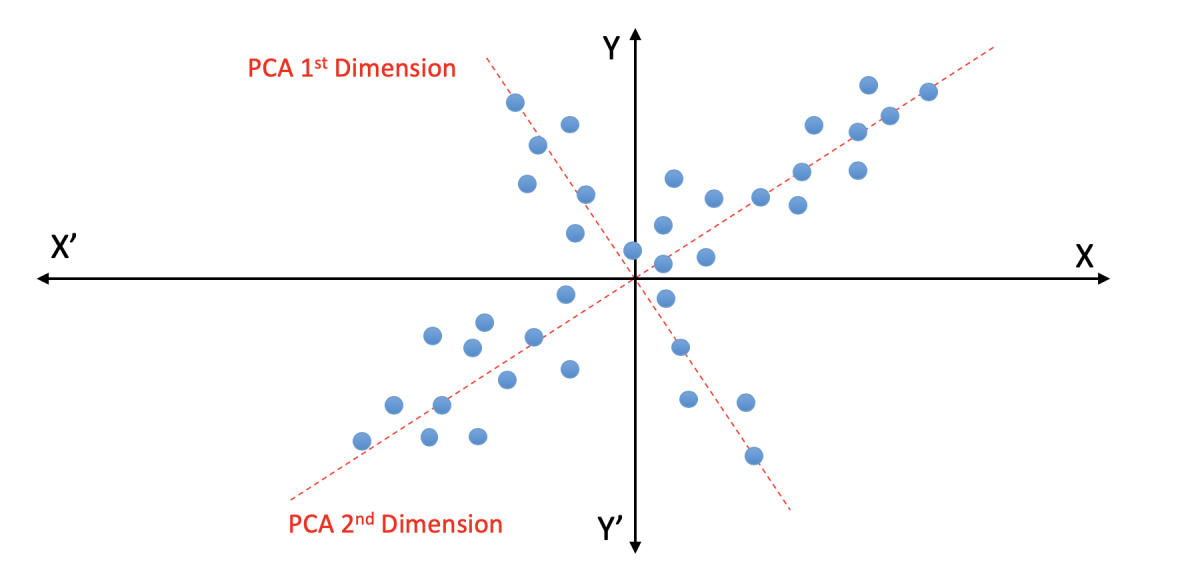

### Import
We start with the typical import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

### Configuration
Setup our configruation for PCA

In [2]:
# Matplotlib setup
plt.rcParams['image.cmap'] = 'gray'

# Color from R ggplot colormap
color = [
    '#6388b4', '#ffae34', '#ef6f6a', '#8cc2ca', '#55ad89', '#c3bc3f',
    '#bb7693', '#baa094', '#a9b5ae', '#767676'
]

### Loading the dataset
For this we use the well-knwon dataset mnist

In [3]:
mnist = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
label = mnist['label']
mnist.drop(['label'], inplace=True, axis=1)

### Know the dataset
It is always important to understand the data items within the dataset. 
For MNIST we can simply convert and display the image items from the dataset to get a good idea.


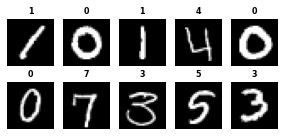

In [6]:
# Convert the array to image shape
def arr2img(arr, img_size=(28, 28)):
    return arr.reshape(img_size)

fig, axes = plt.subplots(2, 5, figsize=(10, 2))

# Enumerate over the index and the items of array
for idx, ax in enumerate(axes.flat):
    ax.imshow(arr2img(mnist[idx:idx + 1].values))
    ax.set_title(label[idx], fontweight='bold', fontsize=8)
    ax.axis('off')

plt.subplots_adjust(bottom=0.1, right=0.5, top=0.9)
plt.show() # Finally map it

### PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(mnist)
mnist_pca = pca.transform(mnist)

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

for idx in range(10):
    fig.add_trace(
        go.Scatter(x=mnist_pca[:, 0][label == idx],
                   y=mnist_pca[:, 1][label == idx],
                   name=str(idx),
                   opacity=0.6,
                   mode='markers',
                   marker=dict(color=color[idx])))

fig.update_layout(width=800,
                  height=800,
                  title="PCA result",
                  yaxis=dict(scaleanchor="x", scaleratio=1),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.02,
                              xanchor="right",
                              x=1))

fig.show()

And that is our PCA :) 